# Shot visualization

In [1]:
import pandas as pd

In [2]:
import json

**Tu choisis ton json**

In [3]:
with open('C:\\Users\\marwane\\Documents\\Data Science\\events_19769.json',encoding="utf-8") as data:
    events = json.load(data)

In [4]:
import pprint

**Fonction d'extraction des shots on target**

In [5]:
def shots_on_target(file):
    #isolate the shots events
    shots = []
    for i,val in enumerate(file):
        if file[i]['type']['name'] == 'Shot':
            shots.append(events[i])
            
    #Retrieve the shots on target
    c = 0
    shots_on_T = []
    for i,val in enumerate(shots):
        if (shots[i]['shot']['outcome']['name'] != 'Off T') and (shots[i]['shot']['outcome']['name'] != "Saved Off T") and (shots[i]['shot']['outcome']['name'] != "Wayward"):
            shots_on_T.append(shots[i])
            c = c + 1
                
    return shots_on_T

**Rassembler tous les events avec Shot on Target**

In [6]:
sot = shots_on_target(events)

In [7]:
len(sot)

15

In [8]:
dfs = []


for i,val in enumerate(sot):
    # Reinitialisation après un loop de i
    indexes = []
    x = []
    y = []
    player = []
    position = []
    teammate = []
    #df = pd.Dataframe()
    
    #print('\n index : ',sot[i]['index']," | len : ",len(sot[i]['shot']['freeze_frame']),'\n')
    
    
    for j,val2 in enumerate(sot[i]['shot']['freeze_frame']):
        
        indexes.append(sot[i]['index'])
        #print("X : ",sot[i]['shot']['freeze_frame'][j]['location'][0])
        x.append(sot[i]['shot']['freeze_frame'][j]['location'][0])
        
        #print("Y : ",sot[i]['shot']['freeze_frame'][j]['location'][1])
        y.append(sot[i]['shot']['freeze_frame'][j]['location'][1])
        
        #print(sot[i]['shot']['freeze_frame'][j]['player']['name'])
        player.append(sot[i]['shot']['freeze_frame'][j]['player']['name'])
        
        #print(sot[i]['shot']['freeze_frame'][j]['position']['name'])
        position.append(sot[i]['shot']['freeze_frame'][j]['position']['name'])
        
        #print(sot[i]['shot']['freeze_frame'][j]['teammate'])
        teammate.append(sot[i]['shot']['freeze_frame'][j]['teammate'])
        
    df = pd.DataFrame({'Index':indexes,'X':x,'Y':y,'Player':player,'Position':position,'team mate':teammate})
    dfs.append(df)
    
    

**Parcourir une liste de 15 Dataframes et afficher la longueur de chaque df**

In [9]:
for i in dfs:
    print(len(i))

17
7
16
10
9
16
12
17
13
8
7
9
5
6
10


In [10]:
dfs[3]

,Index,X,Y,Player,Position,team mate
0,1077,110.0,44.0,Iniabasi Anefiok Umotong,Center Forward,True
1,1077,107.0,41.0,Aileen Whelan,Left Wing,True
2,1077,106.0,43.0,Ellie Brazil,Right Wing,True
3,1077,108.0,46.0,Esmee de Graaf,Left Wing,False
4,1077,105.0,35.0,Julia Simic,Right Center Midfield,False
5,1077,105.0,38.0,Kate Longhurst,Right Back,False
6,1077,105.0,48.0,Brianna Visalli,Left Center Midfield,False
7,1077,113.0,38.0,Gilly Louise Scarlett Flaherty,Right Center Back,False
8,1077,120.0,41.0,Anne Moorhouse,Goalkeeper,False
9,1077,110.0,42.0,Brooke Hendrix,Left Center Back,False


### Retrieving the shooter data

In [11]:
pprint.pprint(sot[0])

{'duration': 0.7736,
 'id': 'a718983f-cef4-4032-bb3d-96591f58be95',
 'index': 95,
 'location': [113.0, 34.0],
 'minute': 2,
 'period': 1,
 'play_pattern': {'id': 2, 'name': 'From Corner'},
 'player': {'id': 18151, 'name': 'Gilly Louise Scarlett Flaherty'},
 'position': {'id': 3, 'name': 'Right Center Back'},
 'possession': 7,
 'possession_team': {'id': 972, 'name': 'West Ham United LFC'},
 'related_events': ['281d2af7-3ffb-4b90-8712-9ee775165f70',
                    'e2b4f0b8-758c-40b7-b9a8-13686c22ee8b'],
 'second': 3,
 'shot': {'aerial_won': True,
          'body_part': {'id': 37, 'name': 'Head'},
          'end_location': [119.0, 36.4, 2.4],
          'freeze_frame': [{'location': [118.0, 37.0],
                            'player': {'id': 19419, 'name': 'Marie Hourihan'},
                            'position': {'id': 1, 'name': 'Goalkeeper'},
                            'teammate': False},
                           {'location': [113.0, 35.0],
                            'player'

In [12]:
indexes = []
names = []
positions = []
players_x = []
players_y = []
ends_x = []
ends_y = []
body_parts = []


for i in sot:
    #print(i['player']['name'])
    indexes.append(i['index'])
    names.append(i['player']['name'])
    positions.append(i['position']['name'])
    body_parts.append(i['shot']['body_part']['name'])
    players_x.append(i['location'][0])
    players_y.append(i['location'][1])
    ends_x.append(i['shot']['end_location'][0])
    ends_y.append(i['shot']['end_location'][1])
    
print(len(indexes),len(names),len(positions),len(players_x),len(players_y),len(ends_x),len(ends_y),len(body_parts))



shooter_df = pd.DataFrame({'Index':indexes,'Name':names,'Position':positions,'Bodt part':body_parts,'X':players_x,'Y':players_y,'End X':ends_x,'End Y':ends_y})
   

15 15 15 15 15 15 15 15


In [13]:
shooter_df

,Index,Name,Position,Bodt part,X,Y,End X,End Y
0,95,Gilly Louise Scarlett Flaherty,Right Center Back,Head,113.0,34.0,119.0,36.4
1,967,Kayleigh Green,Right Defensive Midfield,Right Foot,106.0,61.0,118.0,43.8
2,1040,Lucienne Reichardt,Center Defensive Midfield,Head,109.0,37.0,114.0,39.0
3,1077,Chloe Peplow,Left Defensive Midfield,Right Foot,101.0,35.0,104.0,36.0
4,1264,Iniabasi Anefiok Umotong,Center Forward,Right Foot,107.0,36.0,110.0,44.0
5,1443,Kirsty Barton,Right Back,Right Foot,96.0,53.0,106.0,45.0
6,1839,Iniabasi Anefiok Umotong,Center Forward,Right Foot,94.0,49.0,101.0,43.0
7,1849,Danielle Buet,Center Attacking Midfield,Right Foot,95.0,25.0,104.0,33.0
8,1925,Iniabasi Anefiok Umotong,Center Forward,Right Foot,90.0,26.0,102.0,31.0
9,2305,Jane Ross,Center Forward,Head,116.0,43.0,120.0,36.6


### Visualizing the players position

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch
import seaborn as sns
%matplotlib inline

In [15]:
plt.rcParams['figure.figsize'] = [20, 10]


In [16]:
dfs[0]['X']

0     118.0
1     113.0
2     108.0
3     115.0
4     116.0
5     120.0
6     116.0
7     119.0
8     119.0
9     117.0
10     93.0
11    106.0
12    115.0
13    117.0
14    115.0
15    118.0
16    115.0
Name: X, dtype: float64

In [25]:
shooter_df.iloc[0]['X']

113.0

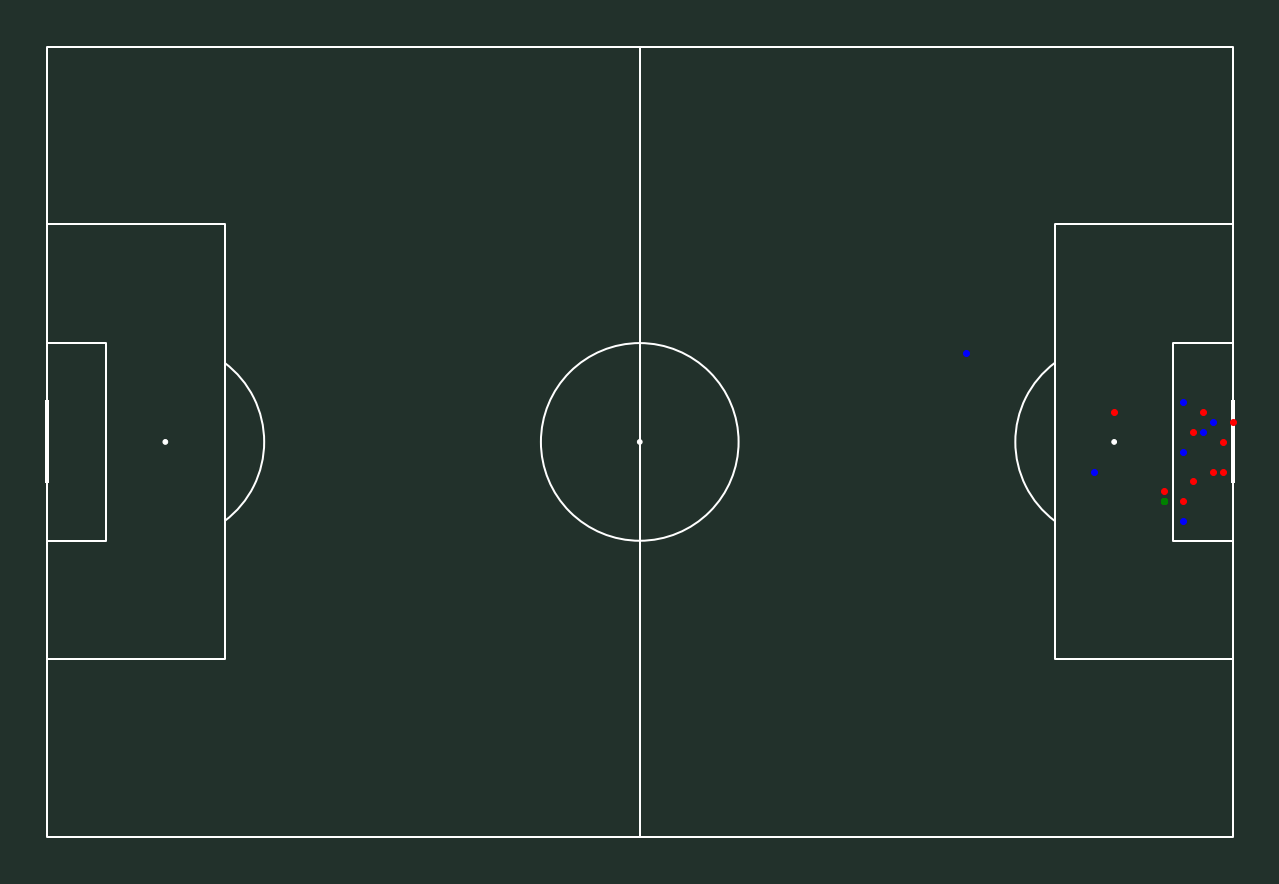

In [29]:
# DRawing the plot
fig,ax = plt.subplots(figsize=(28,16))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#Drawing the pitch over the plot
pitch = Pitch(pitch_color='#22312b',line_color='white',stripe=False)
pitch.draw(ax=ax)

#Invert Y axis
plt.gca().invert_yaxis()

for i in range(len(dfs[0]['X'])):
    
    # plot the shooter
    plt.scatter(shooter_df.iloc[0]['X'],shooter_df.iloc[0]['Y'],color='green')
    
    # plot the team
    if dfs[0]['team mate'][i] == False:
        plt.scatter(dfs[0]['X'][i],dfs[0]['Y'][i],color='red')
    else:
        plt.scatter(dfs[0]['X'][i],dfs[0]['Y'][i],color='blue')
        
    


